# Title: Using Benford Law to Detect Potential Voting Fraud.

Hi everyone, the US election in 2020 is pretty tense. By now (Nov 12) both Joe Biden and Donald Trump seem to be claiming presidency for the next term. It is extremely hard to determine who won the election precisely, unless someone recount all the ballots, which is extremely time-consuming and money-consuming. In the following I am trying to introduce a much simpler methods to quickly check whether there's phoney elements or not. The algorithm we are trying to employ is called "Benford's Law" https://en.wikipedia.org/wiki/Benford%27s_law

It is an informal (not rigorosly proven) law, that specifies that in many natural occuring populations (an counter-example for "natural" will be phone numbers or user-choosed numbers), the leading digits are likely to be small digits (like 1,2,3...). A rule of thumb is that the number 1 appear as the leading digit about 30% of the time; the number 9 appearing as the leading digit around 5% of the time. And the distribution will be approximately exhibiting a 1/f power law. Intrestingly, for my research on human electroencephalogram (EEG), the EEG signal power-frequency relations also exhibits such 1/f power law.  

In the following, I am trying to illustrate this BenFord's law using several examples:

## Example 1. Country GDP Data
I have collected GDP data for countries from https://data.worldbank.org/indicator/NY.GDP.MKTP.KD. Let's try to see if fits into our BenFord Law. 


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
gdp_data = pd.read_csv("gdp_data.csv", encoding='cp1252')

(array([0.30952381, 0.21031746, 0.09126984, 0.11507937, 0.08333333,
        0.06746032, 0.05555556, 0.03174603, 0.03571429]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 9 artists>)

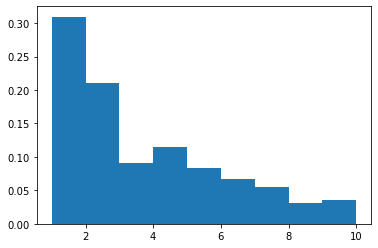

In [44]:
# Use data from 2010:
gdp_2010 = gdp_data['2010'].dropna() # drop na
gdp_firstdigits = []
bins_list = np.arange(1,11,1)

for i in gdp_2010:
   #print(str(i)[0])
    gdp_firstdigits.append(int(str(i)[0]))
plt.hist(gdp_firstdigits,bins = bins_list,density = True)

In [32]:
print(np.sum(np.array(gdp_firstdigits)==1)/len(gdp_firstdigits)) # Proportion of 1 as leading digit
print(np.sum(np.array(gdp_firstdigits)==9)/len(gdp_firstdigits)) # Proportion of 9 as leading digit

0.30952380952380953
0.03571428571428571


# We found that GDP data for countries exhibit this BenFord Law closely

## Example 2: U.S County level population

The next example will be the county-level population data for U.S in 2010. I collected it from https://www.census.gov/data/tables/time-series/demo/popest/2010s-counties-total.html#par_textimage. The dataset has population estimates for 3193 counties across U.S from 2010-2020.

In [47]:
popu_data = pd.read_csv("pop_data.csv", encoding='cp1252')

In [48]:
print(popu_data.shape)

(3193, 164)


(array([0.30222361, 0.18853743, 0.11869715, 0.09771375, 0.06890072,
        0.06796117, 0.05731287, 0.04854369, 0.05010961]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 9 artists>)

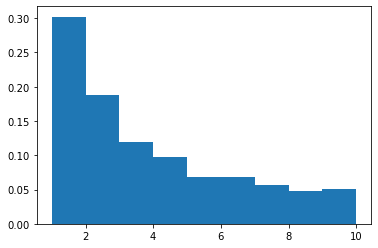

In [49]:
pop_2010 = popu_data['ESTIMATESBASE2010'].dropna() # drop na
pop_firstdigits = []
bins_list = np.arange(1,11,1)

for i in pop_2010:
   #print(str(i)[0])
    pop_firstdigits.append(int(str(i)[0]))
plt.hist(pop_firstdigits,bins = bins_list,density = True)

In [50]:
print(np.sum(np.array(pop_firstdigits)==1)/len(pop_firstdigits)) # Proportion of 1 as leading digit
print(np.sum(np.array(pop_firstdigits)==9)/len(pop_firstdigits)) # Proportion of 9 as leading digit

0.30222361415596616
0.05010961478233636


# Again, the County-level population exhibits BenFord's Law

## Example 3: US. county level election result 2016

Let's take a look at the U.S county level election result in 2016. Data contains election results for 3141 counties across U.S in 2016. Data Source: https://github.com/tonmcg/US_County_Level_Election_Results_08-20.

In [65]:
vote2016_data = pd.read_csv("voting_data.csv", encoding='cp1252')

In [66]:
print(vote2016_data.shape)

(3141, 11)


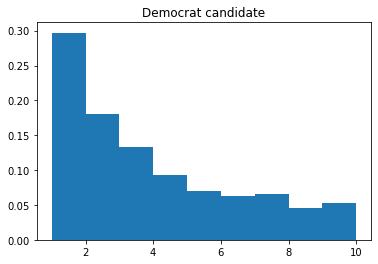

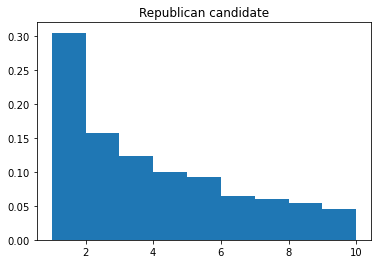

In [67]:
vote2016_dem = vote2016_data['votes_dem'].dropna() # drop na
vote2016_rep = vote2016_data['votes_gop'].dropna() # drop na

dem_2016_digits = []
bins_list = np.arange(1,11,1)

for i in vote2016_dem:
    dem_2016_digits.append(int(str(i)[0]))
plt.hist(dem_2016_digits,bins = bins_list,density = True)
plt.title("Democrat candidate")
plt.show()
#========================================================
rep_2016_digits = []
bins_list = np.arange(1,11,1)

for i in vote2016_rep:
    rep_2016_digits.append(int(str(i)[0]))
plt.hist(rep_2016_digits,bins = bins_list,density = True)
plt.title("Republican candidate")
plt.show()

In [68]:
# Democrats:

print(np.sum(np.array(dem_2016_digits)==1)/len(dem_2016_digits)) # Proportion of 1 as leading digit
print(np.sum(np.array(dem_2016_digits)==9)/len(dem_2016_digits)) # Proportion of 9 as leading digit

0.29703915950334286
0.05221267112384591


In [69]:
print(np.sum(np.array(rep_2016_digits)==1)/len(rep_2016_digits)) # Proportion of 1 as leading digit
print(np.sum(np.array(rep_2016_digits)==9)/len(rep_2016_digits)) # Proportion of 9 as leading digit

0.3046800382043935
0.04552690226042662


# We see that the numbers and the distributions of the 2016 presidential election results follow closely with BenFord's Law

## Example 4. U.S Presidential Election Results 2020 (Nov 12).
The data is obtained from https://github.com/favstats/USElection2020-NYT-Results, which is based on New York Time election reports. It currently contains county level election results for 3159 counties across U.S

In [62]:
vote2020_data = pd.read_csv("presidential2020.csv", encoding='cp1252')

In [64]:
print(vote2020_data.shape)

(3159, 106)


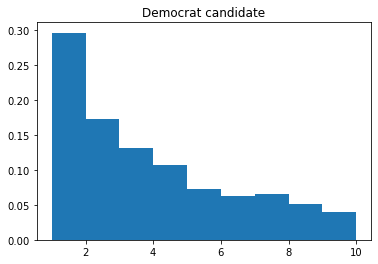

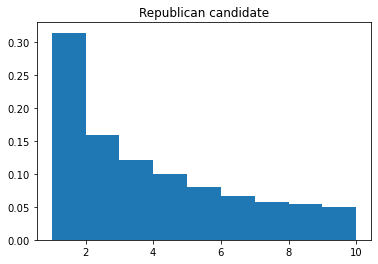

In [73]:
vote2020_dem = vote2020_data['results_bidenj'].dropna()+vote2020_data['results_absentee_bidenj'].dropna()
vote2020_rep = vote2020_data['results_trumpd'].dropna()+vote2020_data['results_absentee_trumpd'].dropna()


dem_2020_digits = []
bins_list = np.arange(1,11,1)

for i in vote2020_dem:
    dem_2020_digits.append(int(str(i)[0]))
plt.hist(dem_2020_digits,bins = bins_list,density = True)
plt.title("Democrat candidate")
plt.show()
#========================================================
rep_2020_digits = []
bins_list = np.arange(1,11,1)

for i in vote2020_rep:
    rep_2020_digits.append(int(str(i)[0]))
plt.hist(rep_2020_digits,bins = bins_list,density = True)
plt.title("Republican candidate")
plt.show()

In [74]:
# Democrats:

print(np.sum(np.array(dem_2020_digits)==1)/len(dem_2020_digits)) # Proportion of 1 as leading digit
print(np.sum(np.array(dem_2020_digits)==9)/len(dem_2020_digits)) # Proportion of 9 as leading digit

0.2962962962962963
0.03925292814181703


In [75]:
print(np.sum(np.array(rep_2020_digits)==1)/len(rep_2020_digits)) # Proportion of 1 as leading digit
print(np.sum(np.array(rep_2020_digits)==9)/len(rep_2020_digits)) # Proportion of 9 as leading digit

0.31402342513453624
0.04969927192149414


In [78]:
vote2020_restricted = vote2020_data[vote2020_data['state'].isin(['michigan','wisconsin','utah','georgia','arizona','pennsylvania'])]

# We see that the results pretty much follows the BenFord Proportions and distribution! At least based on county level data gathered across U.S , we don't see significant violations of benford's law.

['arizona' 'georgia' 'michigan' 'pennsylvania' 'utah' 'wisconsin']
(425,)


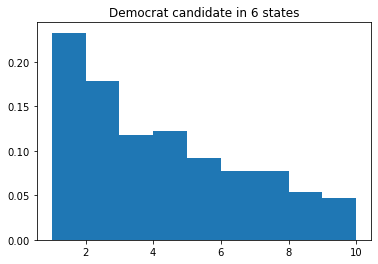

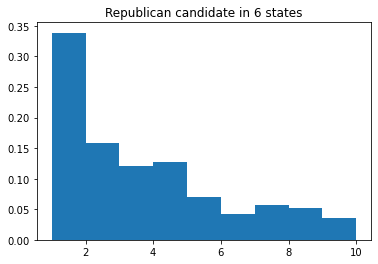

In [85]:
## And if we zoom into counties in Michigan, Wisconsin, Pennsylvania, Utah, Arizona and Georgia, which gives us 425 counties:
vote2020_restricted = vote2020_data[vote2020_data['state'].isin(['michigan','wisconsin','utah','georgia','arizona','pennsylvania'])]
print(np.unique(vote2020_restricted['state'])) # Sanity check
print(vote2020_rep_restricted.shape)
vote2020_dem_restricted = vote2020_restricted['results_bidenj'].dropna()+vote2020_restricted['results_absentee_bidenj'].dropna()
vote2020_rep_restricted = vote2020_restricted['results_trumpd'].dropna()+vote2020_restricted['results_absentee_trumpd'].dropna()


dem_2020_digits_restricted = []
bins_list = np.arange(1,11,1)

for i in vote2020_dem_restricted:
    dem_2020_digits_restricted.append(int(str(i)[0]))
plt.hist(dem_2020_digits_restricted,bins = bins_list,density = True)
plt.title("Democrat candidate in 6 states")
plt.show()
#========================================================
rep_2020_digits_restricted = []
bins_list = np.arange(1,11,1)

for i in vote2020_rep_restricted:
    rep_2020_digits_restricted.append(int(str(i)[0]))
plt.hist(rep_2020_digits_restricted,bins = bins_list,density = True)
plt.title("Republican candidate in 6 states")
plt.show()

In [83]:
# Democrats:

print(np.sum(np.array(dem_2020_digits_restricted)==1)/len(dem_2020_digits_restricted)) # Proportion of 1 as leading digit
print(np.sum(np.array(dem_2020_digits_restricted)==9)/len(dem_2020_digits_restricted)) # Proportion of 9 as leading digit

0.23294117647058823
0.047058823529411764


In [84]:
print(np.sum(np.array(rep_2020_digits_restricted)==1)/len(rep_2020_digits_restricted)) # Proportion of 1 as leading digit
print(np.sum(np.array(rep_2020_digits_restricted)==9)/len(rep_2020_digits_restricted)) # Proportion of 9 as leading digit

0.3388235294117647
0.03529411764705882


# We see that the results are not as pretty as before. But this might be due to the fact that we have a much smaller number of counties. Overall, both the proportions and the distribution of leading digits in these 6 states still follows the BenFord's Law. There is no significant violations.
